#### 공공데이터 과제 #1 <hr>

- 문제 1

DataFrame 사용

In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [2]:
file = '../DATA/daegu-utf8-df.csv'

In [3]:
# 폰트 파일의 경로 지정
font_path = r'C:\Windows\Fonts\gulim.ttc'

In [4]:
# matplotlib 패키지에 한글 폰트 설정
myFont = fm.FontProperties(fname = font_path).get_name()
mpl.rc('font', family = myFont)

In [5]:
# 한글 폰트 사용시 레이블의 '-' 기호 깨지는 현상 해결
plt.rc('axes', unicode_minus = False)  # plt.rcParams['axes.unicode_minus'] = False와 동일

In [6]:
weather_df = pd.read_csv(file, encoding = 'utf-8-sig')
print(weather_df.columns)
print(weather_df['날짜'].dtype)  # 날짜 컬럼은 object 타입

Index(['날짜', '지점', '평균기온', '최저기온', '최고기온'], dtype='object')
object


In [7]:
weather_df['날짜'].head()

0    1909-01-01
1    1909-01-02
2    1909-01-03
3    1909-01-04
4    1909-01-05
Name: 날짜, dtype: object

In [8]:
weather_df = weather_df[weather_df['날짜'].between('2014-01-01', '2023-12-31')]

In [9]:
weather_df.head()

,날짜,지점,평균기온,최저기온,최고기온
38348,2014-01-01,143,6.5,2.8,10.4
38349,2014-01-02,143,5.5,1.7,10.7
38350,2014-01-03,143,3.8,-1.7,10.8
38351,2014-01-04,143,4.3,-0.8,10.0
38352,2014-01-05,143,4.3,1.5,8.8


In [10]:
weather_df.tail()

,날짜,지점,평균기온,최저기온,최고기온
41994,2023-12-27,143,3.8,-0.9,11.3
41995,2023-12-28,143,3.5,-3.0,10.6
41996,2023-12-29,143,3.1,-2.9,9.5
41997,2023-12-30,143,2.9,-2.9,7.7
41998,2023-12-31,143,4.6,1.4,7.9


In [11]:
weather_df['날짜'] = pd.to_datetime(weather_df['날짜'], format = '%Y-%m-%d')

In [12]:
weather_df['날짜']

38348   2014-01-01
38349   2014-01-02
38350   2014-01-03
38351   2014-01-04
38352   2014-01-05
           ...    
41994   2023-12-27
41995   2023-12-28
41996   2023-12-29
41997   2023-12-30
41998   2023-12-31
Name: 날짜, Length: 3651, dtype: datetime64[ns]

In [13]:
weather_df['날짜'].dt.year

38348    2014
38349    2014
38350    2014
38351    2014
38352    2014
         ... 
41994    2023
41995    2023
41996    2023
41997    2023
41998    2023
Name: 날짜, Length: 3651, dtype: int32

In [14]:
weather_df['날짜'].dt.month

38348     1
38349     1
38350     1
38351     1
38352     1
         ..
41994    12
41995    12
41996    12
41997    12
41998    12
Name: 날짜, Length: 3651, dtype: int32

In [15]:
weather_df['연도'] = weather_df['날짜'].dt.year
weather_df['달'] = weather_df['날짜'].dt.month
weather_df.head()

,날짜,지점,평균기온,최저기온,최고기온,연도,달
38348,2014-01-01,143,6.5,2.8,10.4,2014,1
38349,2014-01-02,143,5.5,1.7,10.7,2014,1
38350,2014-01-03,143,3.8,-1.7,10.8,2014,1
38351,2014-01-04,143,4.3,-0.8,10.0,2014,1
38352,2014-01-05,143,4.3,1.5,8.8,2014,1


In [20]:
max_temp = weather_df.groupby(['연도', '달'])[['최고기온']].max()
min_temp = weather_df.groupby(['연도', '달'])[['최저기온']].min()

In [21]:
max_temp

최고기온
연도   달       
2014 1   15.3
     2   20.4
     3   26.4
     4   27.9
     5   37.4
...       ...
2023 8   37.7
     9   32.8
     10  24.8
     11  27.3
     12  20.0

[120 rows x 1 columns]

In [22]:
min_temp

최저기온
연도   달       
2014 1   -6.2
     2   -7.0
     3   -1.1
     4    4.6
     5    8.5
...       ...
2023 8   21.2
     9   15.3
     10   5.3
     11  -2.4
     12  -9.7

[120 rows x 1 columns]

In [23]:
min_temp.loc[(2014,1)].values[0]

-6.2

In [24]:
diff = max_temp['최고기온'].sub(min_temp['최저기온'])

In [25]:
diff

연도    달 
2014  1     21.5
      2     27.4
      3     27.5
      4     23.3
      5     28.9
            ... 
2023  8     16.5
      9     17.5
      10    19.5
      11    29.7
      12    29.7
Length: 120, dtype: float64

In [26]:
diff.index

MultiIndex([(2014,  1),
            (2014,  2),
            (2014,  3),
            (2014,  4),
            (2014,  5),
            (2014,  6),
            (2014,  7),
            (2014,  8),
            (2014,  9),
            (2014, 10),
            ...
            (2023,  3),
            (2023,  4),
            (2023,  5),
            (2023,  6),
            (2023,  7),
            (2023,  8),
            (2023,  9),
            (2023, 10),
            (2023, 11),
            (2023, 12)],
           names=['연도', '달'], length=120)

In [27]:
diff.xs(2016, level = 0)

달
1     26.9
2     22.0
3     27.0
4     23.2
5     24.1
6     21.2
7     16.7
8     21.2
9     19.1
10    21.9
11    23.4
12    21.7
dtype: float64

In [28]:
diff.xs(2016, level = 0).idxmax()

3

Text(0.5, 1.0, '지난 10년간 대구의 일교차가 가장 큰 달')

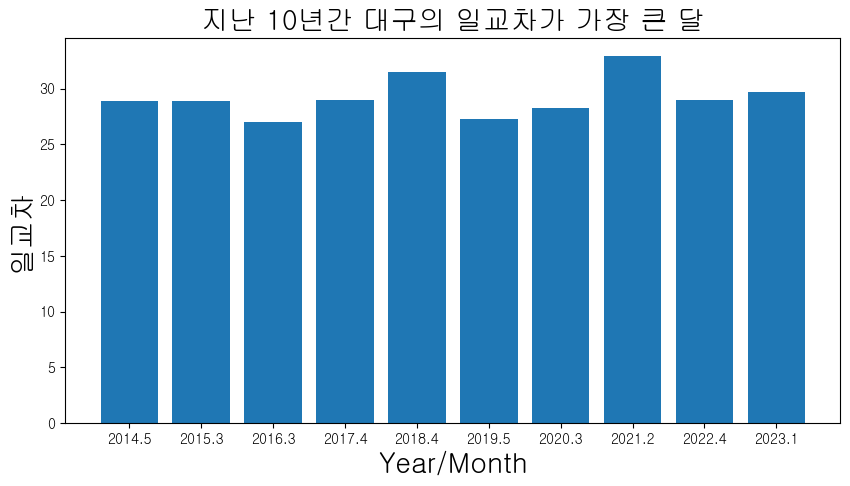

In [29]:
year_month = []
diff_max = []
for year in range(2014, 2024):
    year_month.append(str(year) + '.' + str(diff.xs(year, level = 0).idxmax()))
    diff_max.append(diff.xs(year, level = 0).max())
    
plt.figure(figsize = (10, 5))
plt.bar(year_month, diff_max)
plt.xlabel('Year/Month', fontsize = 20)
plt.ylabel('일교차', fontsize = 20)
plt.title('지난 10년간 대구의 일교차가 가장 큰 달', fontsize = 20)

- 문제 2

DataFrame 사용

In [165]:
def plot_graph():
    
    start_year = int(input('시작 연도를 입력하세요 : '))
    last_year = int(input('마지막 연도를 입력하세요 : '))
    change_month = int(input('기온 변화를 측정할 달을 입력하세요 : '))
    
    weather_df = pd.read_csv(file, encoding = 'utf-8-sig')
    weather_df = weather_df[weather_df['날짜'].between(str(start_year) +'-01-01', str(last_year) + '-12-31')]

    weather_df['날짜'] = pd.to_datetime(weather_df['날짜'], format = '%Y-%m-%d')
    
    weather_df['연도'] = weather_df['날짜'].dt.year
    weather_df['달'] = weather_df['날짜'].dt.month
    
    max_temp_mean = weather_df.groupby(['연도', '달']).mean()[['최고기온']]
    min_temp_mean = weather_df.groupby(['연도', '달']).mean()[['최저기온']]

    value_max_mean = []
    value_min_mean = []
    for year in range(start_year, last_year + 1):
        value_max_mean.append(round(max_temp_mean.loc[(year, change_month)].values[0], 1))
        value_min_mean.append(round(min_temp_mean.loc[(year, change_month)].values[0], 1))
    
    print(f'{change_month}월 최저기온 평균 : {value_min_mean}')
    print(f'{change_month}월 최고기온 평균 : {value_max_mean}')
    
    plt.figure(figsize = (15, 5))
    plt.plot(range(start_year, last_year + 1), value_max_mean, 'ro-', label = '최고기온')
    plt.plot(range(start_year, last_year + 1), value_min_mean, 'bo-', label = '최저기온')
    plt.xticks(np.arange(start_year, last_year + 1))  # np.arange를 이용하여 눈금 간격 1로 조정
    plt.title(f'{start_year}년부터 {last_year}년까지 {change_month}월의 기온 변화', fontsize = 20)
    plt.legend()

8월 최저기온 평균 : [23.7, 22.1, 21.7, 22.4, 22.9, 24.3, 24.2, 22.2, 22.2, 25.0, 23.1, 24.5, 25.0, 21.7, 22.0, 23.2, 22.5, 23.7, 23.7, 24.8, 22.4, 23.4, 24.0]
8월 최고기온 평균 : [31.4, 28.5, 29.2, 30.7, 31.0, 33.3, 32.0, 30.7, 29.7, 33.6, 30.3, 32.4, 34.4, 28.8, 31.2, 33.2, 31.4, 32.9, 32.2, 33.3, 30.5, 31.4, 31.9]


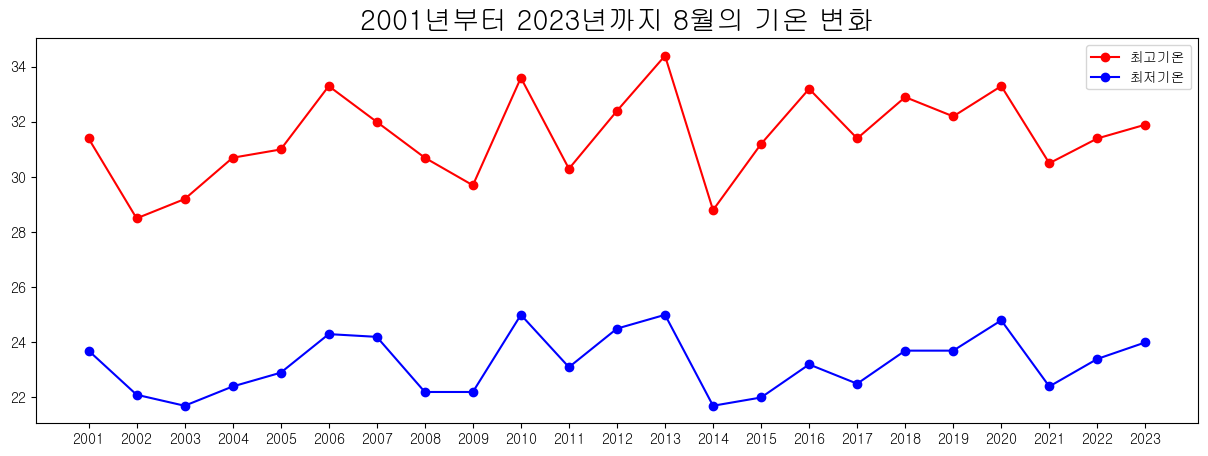

In [166]:
plot_graph()